 # Predicción de Series Temporales
 # Predicción Ingresos Coca-Cola (KO)
 ## Modelos ARIMA
 


In [16]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r",encoding="utf-8").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: 'style.css'

In [17]:
import warnings
warnings.filterwarnings('ignore')

 # Introducción

 <div class="exercise">

 - El objetivo es predecir las ventas de Coca-Cola.

 - Se realizan diferentes predicciones de las ventas de Coca-Cola.

 - Se tienen datos trimestrales desde 1991-1T hasta 2021-2T.

 - Se dejan fuera de la estimación los ocho últimos trimestres para seleccionar el mejor modelo.

 - Se uestiman los modelos ARIMA

 </div>


In [18]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Read Data
ko_df = pd.read_csv('../ko_22T2.csv',sep=';')
ko_df['Fecha'] = pd.to_datetime(ko_df['Fecha'],format="%Y%m%d")
ko_df = ko_df.set_index('Fecha')
ko_df.head()

,Ingresos
Fecha,
2022-06-03,11325
2022-03-03,10491
2021-12-31,9464
2021-09-26,10042
2021-06-03,10129


 <div class="redcuadro">

 Convertimos los datos en trimestrales

 </div>

In [20]:
# Resample to Quarterly I
ko_ts=ko_df.resample("q").last()
ko_ts.tail()

,Ingresos
Fecha,
2021-06-30,10129
2021-09-30,10042
2021-12-31,9464
2022-03-31,10491
2022-06-30,11325


In [21]:
# Resample to Quarterly II
# SKtime format
ko_ts_q=ko_df['Ingresos'].astype('float64').to_period('Q').sort_index()
ko_ts_q.tail()

Fecha
2021Q2    10129.0
2021Q3    10042.0
2021Q4     9464.0
2022Q1    10491.0
2022Q2    11325.0
Freq: Q-DEC, Name: Ingresos, dtype: float64

 # Solución

 ## Graficar los Ingresos
 <div class="hr2"> </div>
 - Tendencia -> No estacionario
 - Componente Estacional
 - Varianza no constante

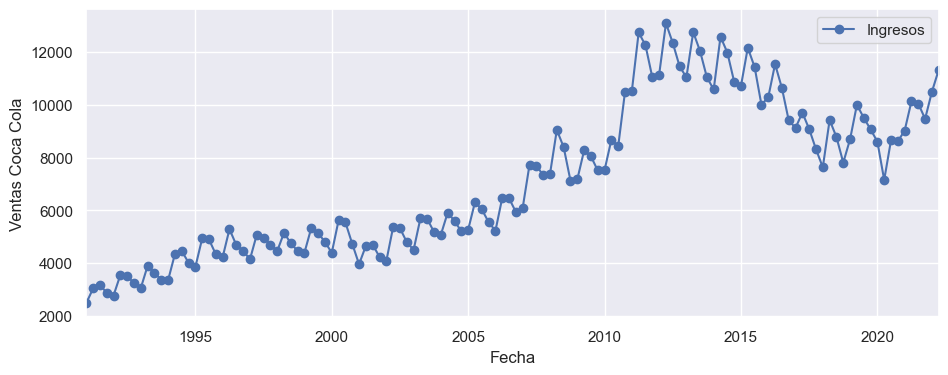

In [22]:
# Plot Data
# Use seaborn style defaults and set the default figure size

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = ko_ts.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola');

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

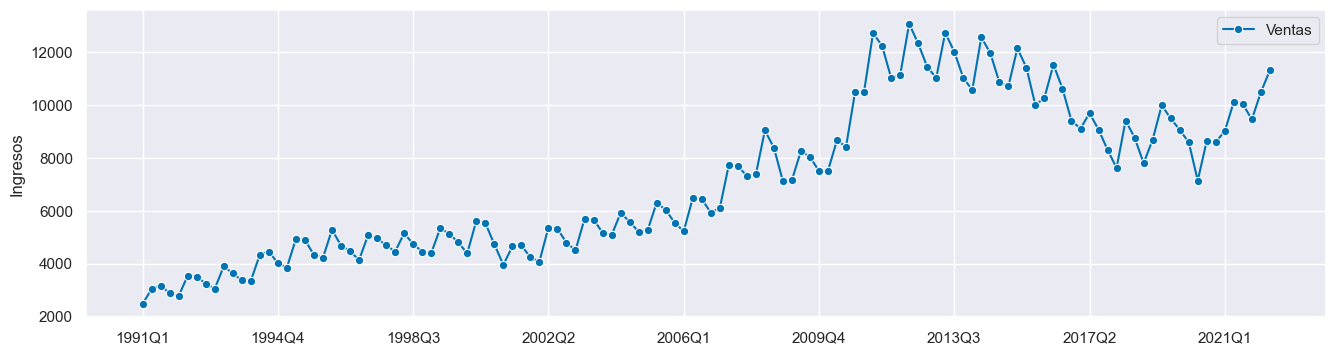

In [23]:
# Plot Data
# Use Sktime style 
from sktime.utils.plotting import plot_series
plot_series(ko_ts_q, labels=["Ventas"])

 # No estacionariedad en Varianza

 <div class="hr2"> </div>
 
 ## Calculamos la transformacion logarítmica de la **Serie Original**

In [24]:
# Log Transformer Function
from sktime.transformations.series.boxcox import LogTransformer

In [25]:
# Apply Log Transformer

transformer = LogTransformer()
log_ko_ts= transformer.fit_transform(ko_ts_q)
log_ko_ts.tail()

2021Q2    9.223158
2021Q3    9.214532
2021Q4    9.155250
2022Q1    9.258273
2022Q2    9.334768
Freq: Q-DEC, Name: Ingresos, dtype: float64

Text(0.5, 1.0, 'Ventas Coca Cola: Transformación LOG')

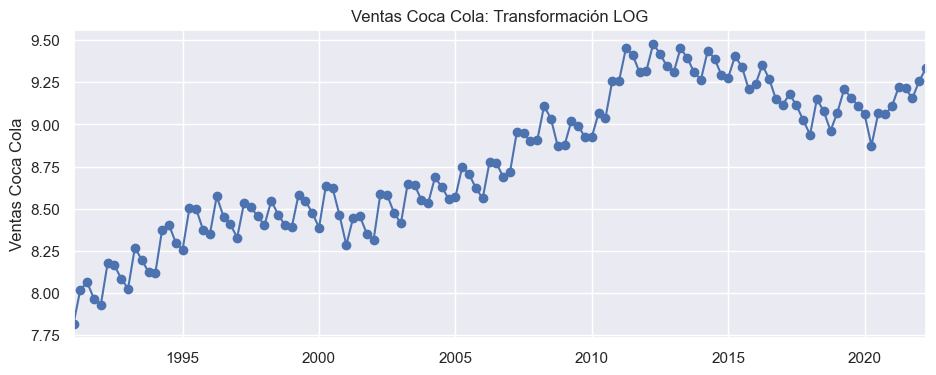

In [26]:
# Plot Log Data
ax = log_ko_ts.plot(marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola')
ax.set_title('Ventas Coca Cola: Transformación LOG')

Text(0.5, 1.0, 'Ventas Coca Cola: Transformación LOG')

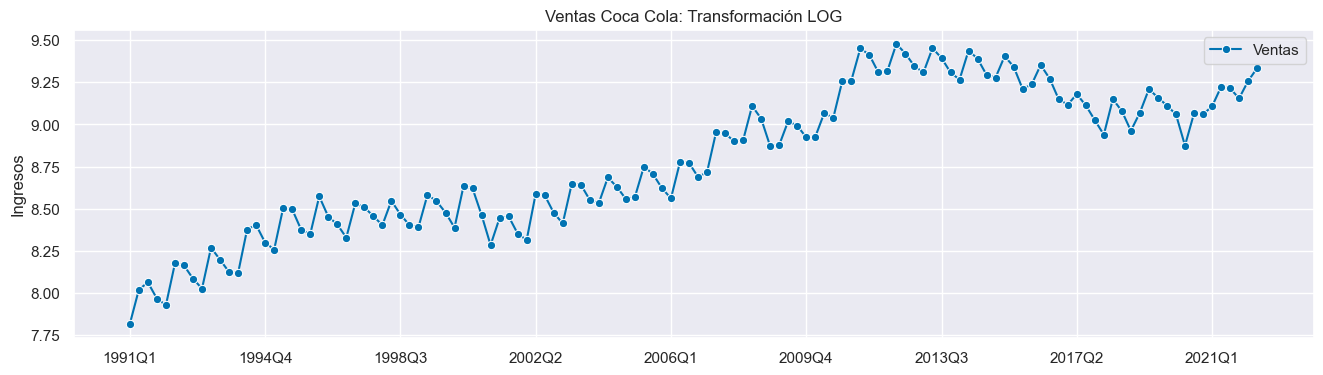

In [27]:
# Plot Log Data
fig, ax =plot_series(log_ko_ts, labels=["Ventas"])
ax.set_title('Ventas Coca Cola: Transformación LOG')

 # No estacionariedad en Varianza

 <div class="hr2"> </div>
 ## Comparamos la transformacion logarítmica de la **Serie Original** y la **Serie en Logs**

Text(0.5, 1.0, 'Ventas Coca Cola: Transformación LOG')

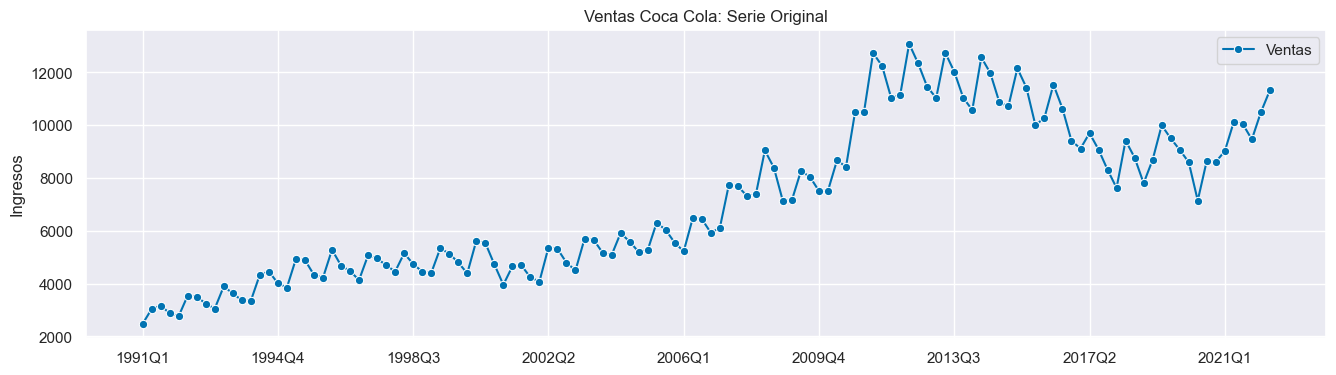

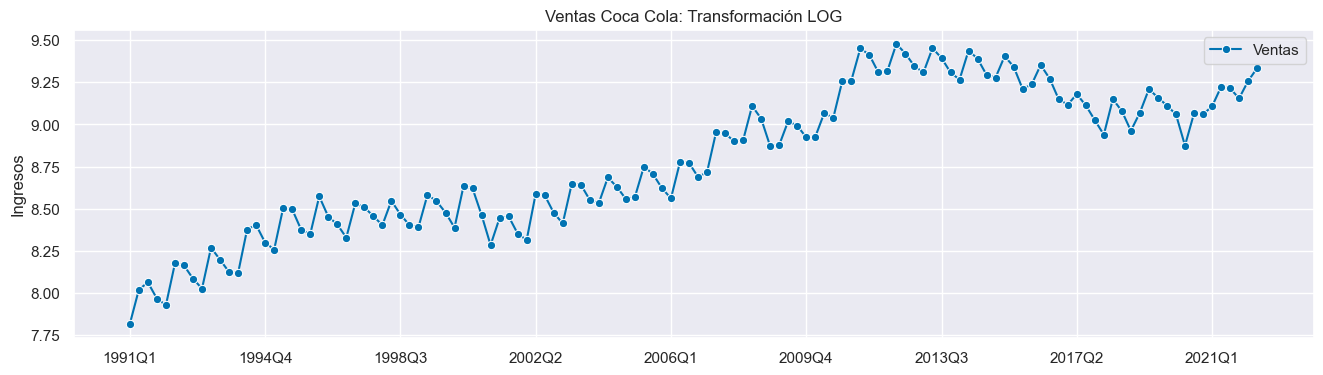

In [28]:
# Plot Log Data & Original Data
fig, ax =plot_series(ko_ts_q, labels=["Ventas"])
ax.set_title('Ventas Coca Cola: Serie Original')
fig, ax =plot_series(log_ko_ts, labels=["Ventas"])
ax.set_title('Ventas Coca Cola: Transformación LOG')

 # Autocorrelación

 <div class="hr2"> </div>
 
 ## Calculamos la Autocorrelación de la **Serie en Logs**

In [29]:
# Autocorrelation Fuction Package
from sktime.utils.plotting import plot_correlations

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Ingresos'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

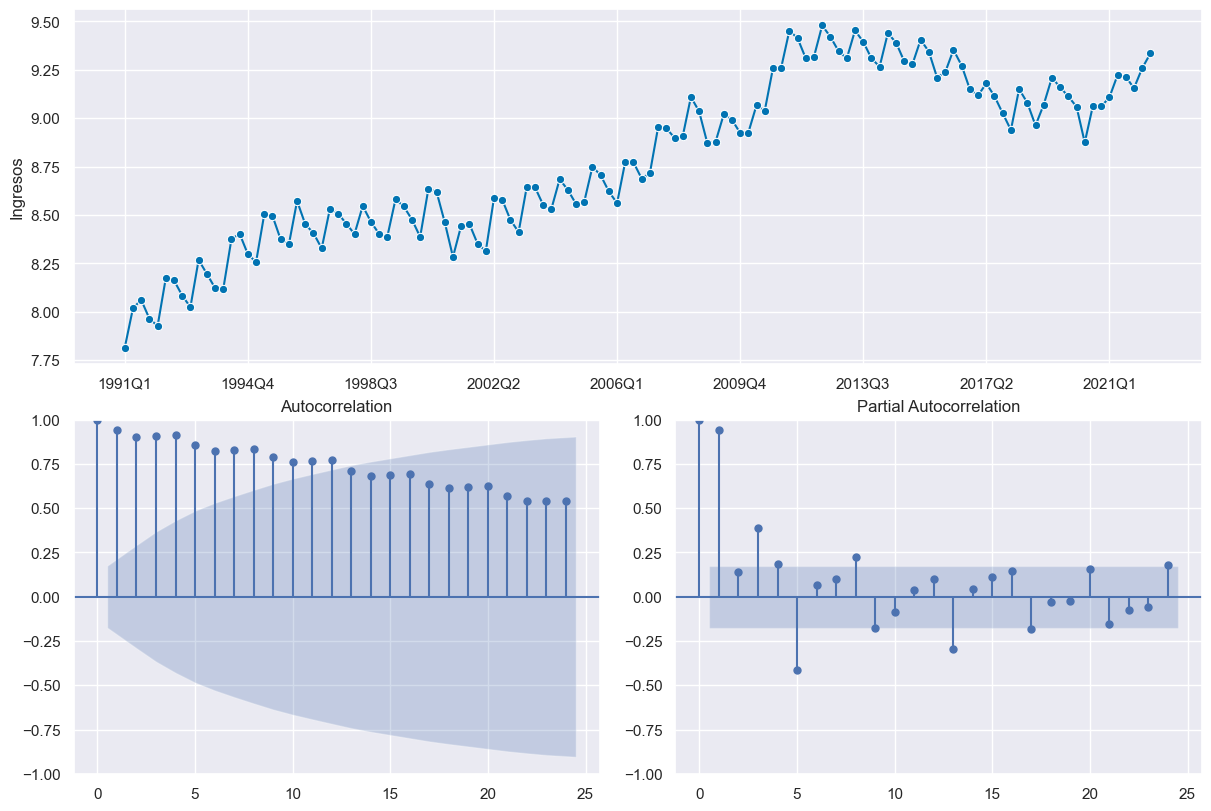

In [30]:
# Autocorrelation Fuction Original Time Series
plot_correlations(log_ko_ts)

In [31]:
# Difference Fuction Package
from sktime.transformations.series.difference import Differencer

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Ingresos'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

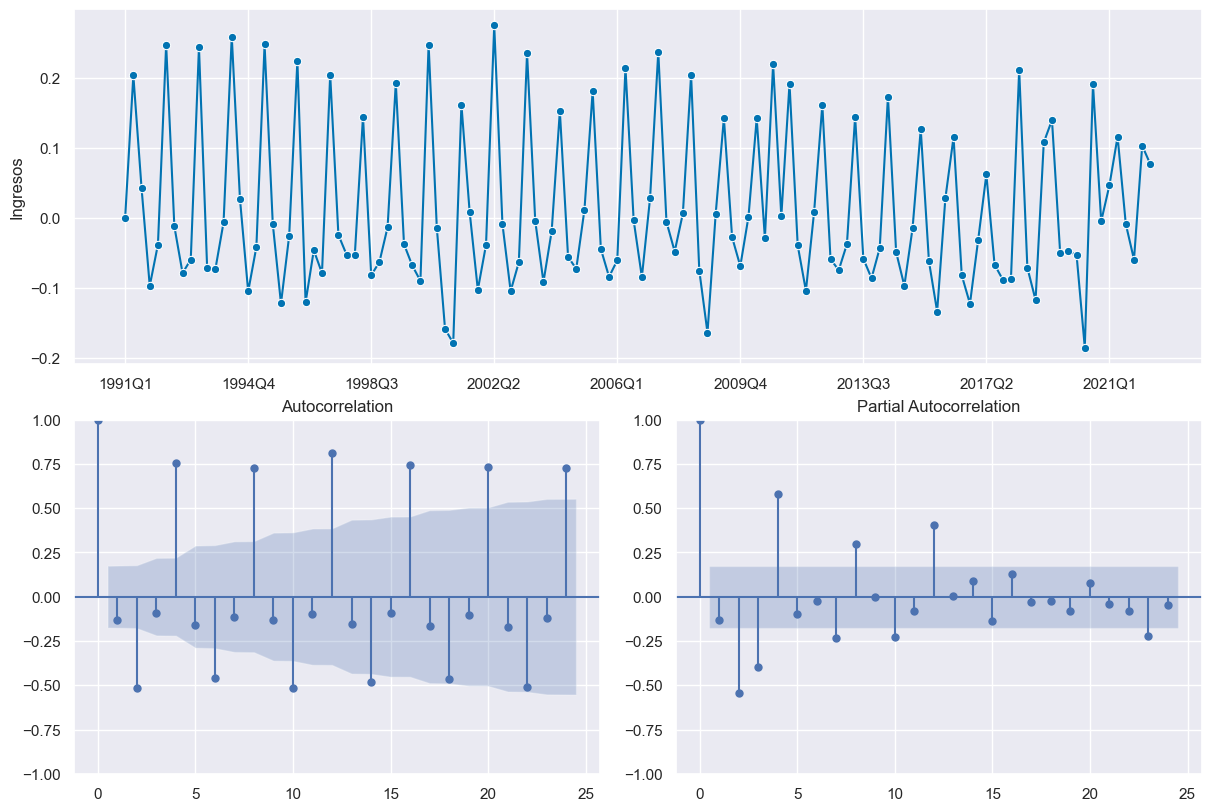

In [32]:
# Autocorrelation Fuction
# d=1; D=0; S=4
# 
#Manu: esta es la tasa de variación intertrimestral (porque lag es 1)
transf_diff=Differencer(lags=[1])
plot_correlations(transf_diff.fit_transform(log_ko_ts))

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Ingresos'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

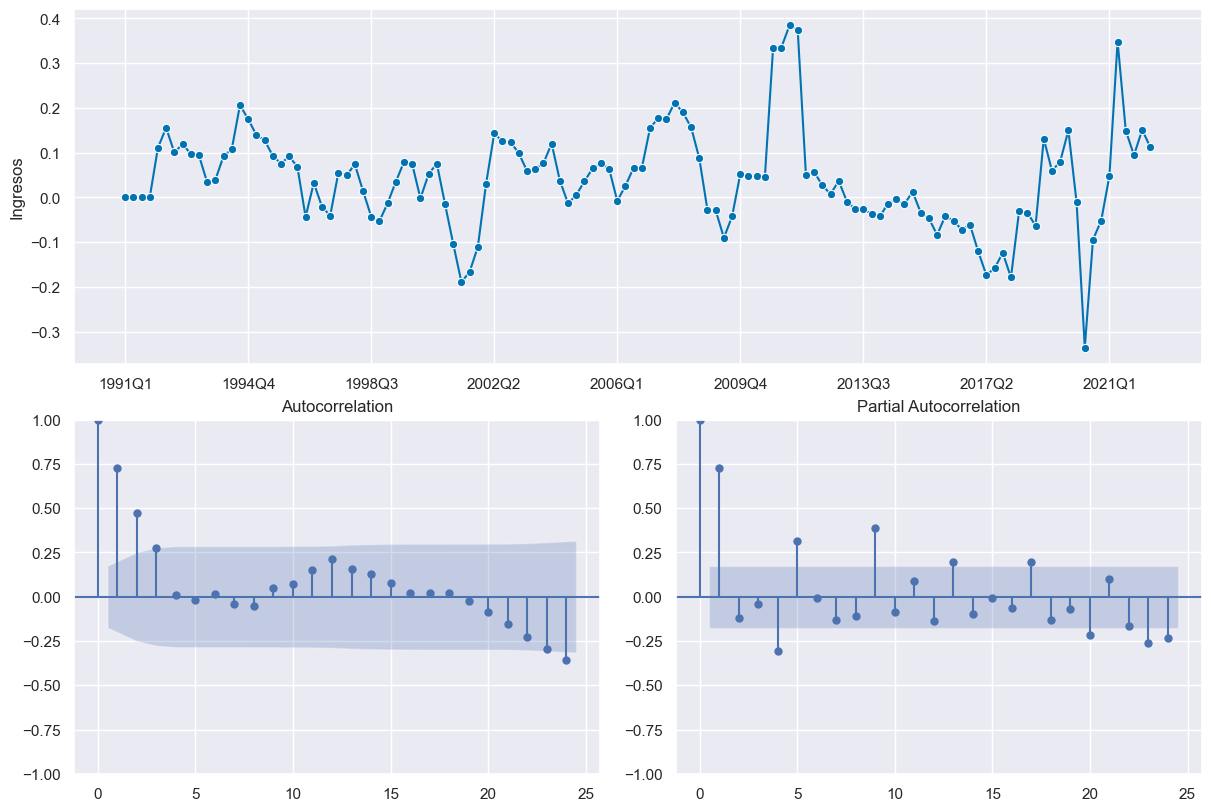

In [33]:
# Autocorrelation Fuction
# d=0; D=1; S=4
#Manu: esta es la tasa de variación anual (porque lag es 4)
transf_diff=Differencer(lags=[4])
plot_correlations(transf_diff.fit_transform(log_ko_ts))

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Ingresos'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

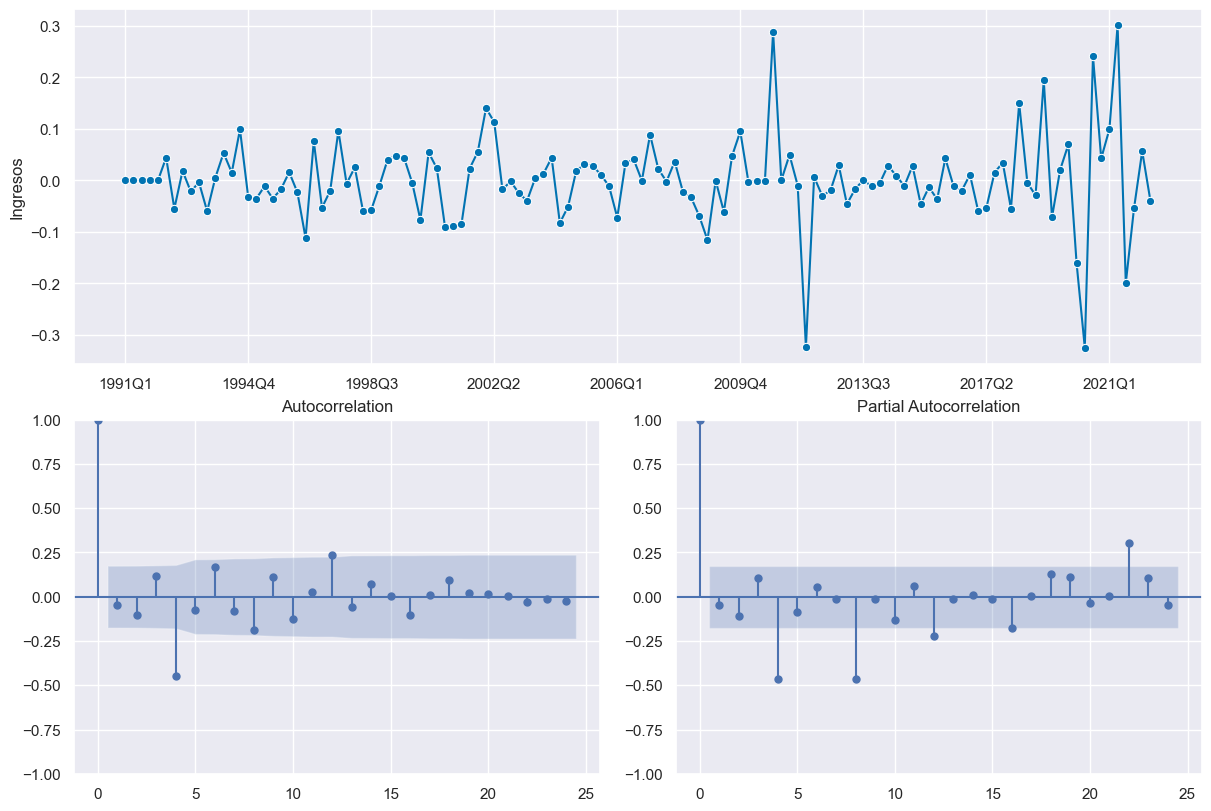

In [34]:
# Autocorrelation Fuction
# d=1; D=1; S=4
# 
transf_diff=Differencer(lags=[1,4])
plot_correlations(transf_diff.fit_transform(log_ko_ts))

 # Modelos ARIMA

 <div class="redcuadro">

 Vamos a separar la muestra en la parte de estiamción (Training) y la parte de predicción/Verificación (Testing). Quitamos 8 trimestres. <br><br>

 Vamos a predecir 8 periodos  (h=8)<br><br>

 </div>

In [35]:
# Sktime fucntions
# Forecast horizon and Split function 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

122 4


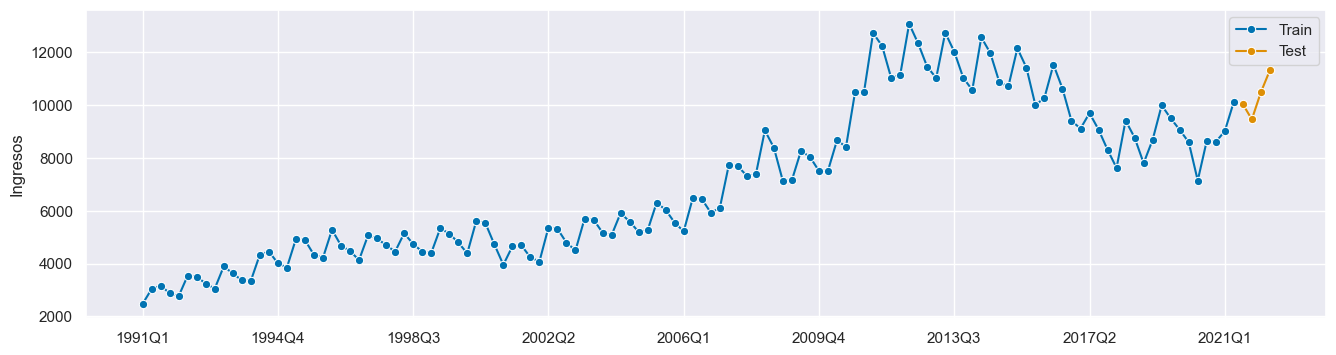

In [36]:
# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
#Manu: Test size 8 quiere decir que es el número de datos (4) que pones en el test
y_train, y_test = temporal_train_test_split(y =ko_ts_q, test_size=4)
log_y_train, log_y_test = temporal_train_test_split(y =log_ko_ts, test_size=4)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [37]:
# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4])

In [56]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA
!pip install pmdarima

In [57]:
#  Auto ARIMA Model

forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=4, suppress_warnings=True)

In [58]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  122
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 4)   Log Likelihood                 159.069
Date:                           Mon, 30 Oct 2023   AIC                           -302.138
Time:                                   20:50:53   BIC                           -279.771
Sample:                               03-31-1991   HQIC                          -293.054
                                    - 06-30-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.001      0.290      0.772      -0.002       0.002
ma.L1         -0.0463      0.068     -0.679

In [59]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

2021Q3    9.214759
2021Q4    9.154070
2022Q1    9.177316
2022Q2    9.292775
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [60]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

2021Q3    10044.281930
2021Q4     9452.831536
2022Q1     9675.151739
2022Q2    10859.280423
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [61]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [62]:
# Forecast Accuracy
# MAPE
mean_absolute_percentage_error(log_y_test, log_y_pred)

0.0033491047422199724

In [63]:
# Forecast Accuracy
# MAPE 
# Orignal Time Serie

mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

0.03007424280877089

In [64]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.045603819247557985

In [65]:
# Forecast Accuracy
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

469.7427624131971

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

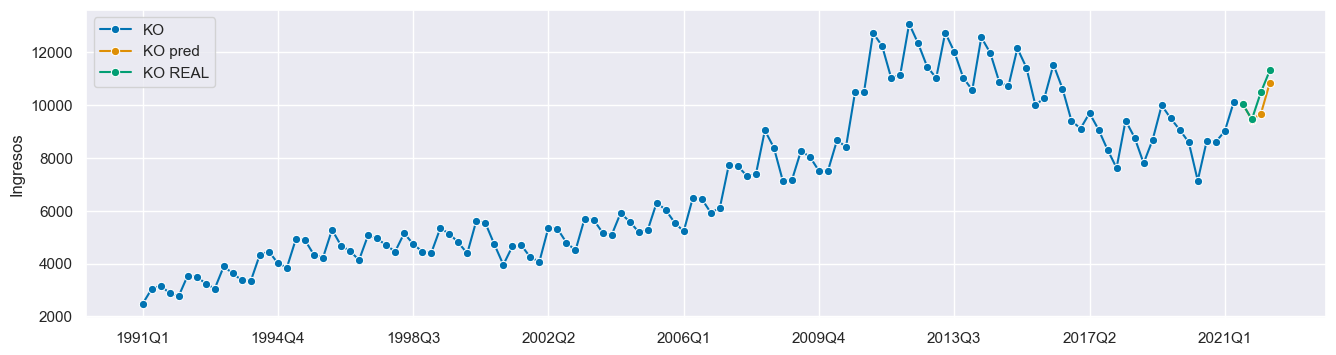

In [66]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["KO", "KO pred", "KO REAL"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

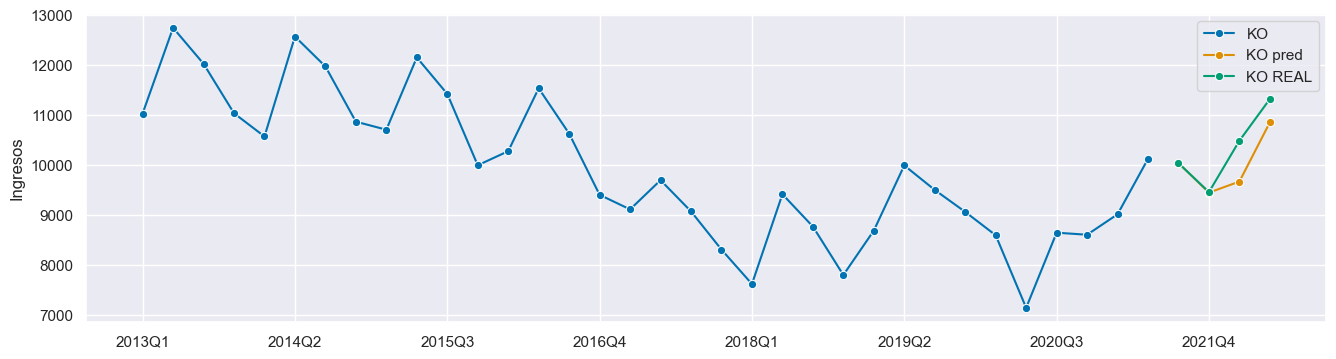

In [67]:
# Forecast Accuracy Plot
# Plotting predictions and past data
# Zoom 2013 -2021
plot_series(y_train["2013":], np.exp(log_y_pred),y_test, labels=["KO", "KO pred", "KO REAL"])

FileNotFoundError: [Errno 2] No such file or directory: 'img/04/predict-AutoARIMA-airline-data-plot.png'

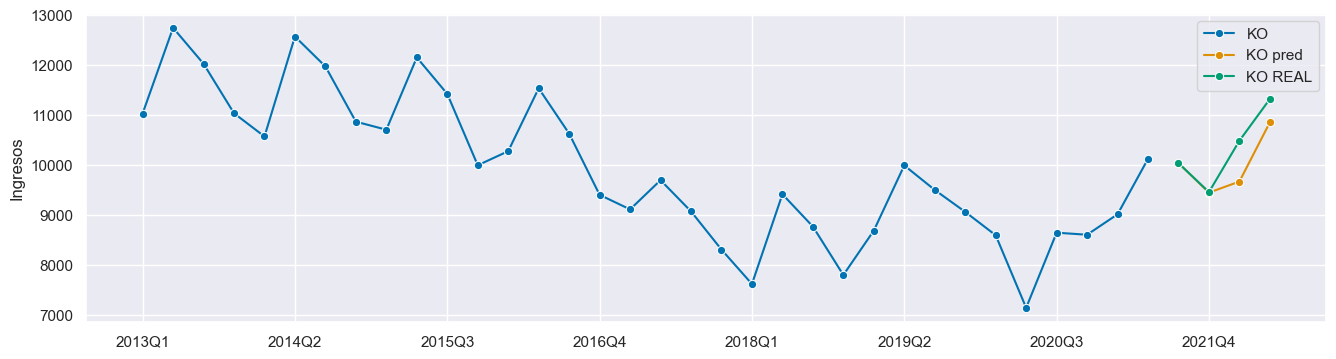

In [68]:
# Save Plot
plot_series(y_train["2013":], np.exp(log_y_pred),y_test, labels=["KO", "KO pred", "KO REAL"])
plt.savefig('img/04/predict-AutoARIMA-airline-data-plot.png',
            dpi=300, bbox_inches='tight')
plt.close('all')

 <div class="redcuadro">

 Vamos a predecir 6 periodos  (h=6), lo que resta del 2021 y el 2022<br><br>

 </div>


In [38]:
# Forecast Horizon
fh = np.arange(6) + 1  # forecasting horizon
fh

array([1, 2, 3, 4, 5, 6])

In [70]:
#  Auto ARIMA Model

forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_ko_ts)

AutoARIMA(sp=4, suppress_warnings=True)

In [71]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  126
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 4)   Log Likelihood                 164.756
Date:                                Mon, 30 Oct 2023   AIC                           -315.512
Time:                                        20:57:22   BIC                           -295.714
Sample:                                    03-31-1991   HQIC                          -307.469
                                         - 06-30-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.001      0.241      0.809      -0.002       0.002
ma.

In [72]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
log_y_pred

2022Q3    9.305023
2022Q4    9.223094
2023Q1    9.222794
2023Q2    9.277330
2023Q3    9.283507
2023Q4    9.235487
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [73]:
#  Auto ARIMA Forecast
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

2022Q3    10993.097352
2022Q4    10128.350550
2023Q1    10125.319298
2023Q2    10692.848668
2023Q3    10759.095639
2023Q4    10254.655283
Freq: Q-DEC, Name: Ingresos, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

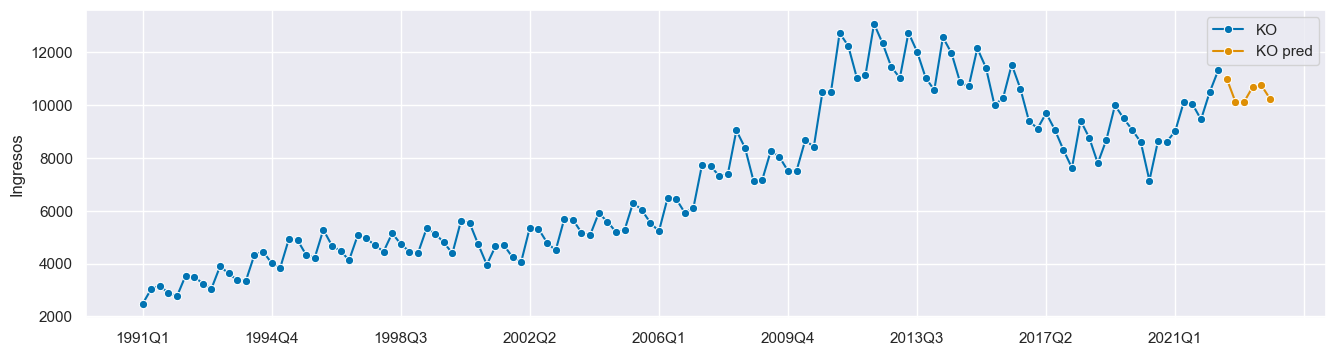

In [74]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(ko_ts_q, np.exp(log_y_pred), labels=["KO", "KO pred"])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

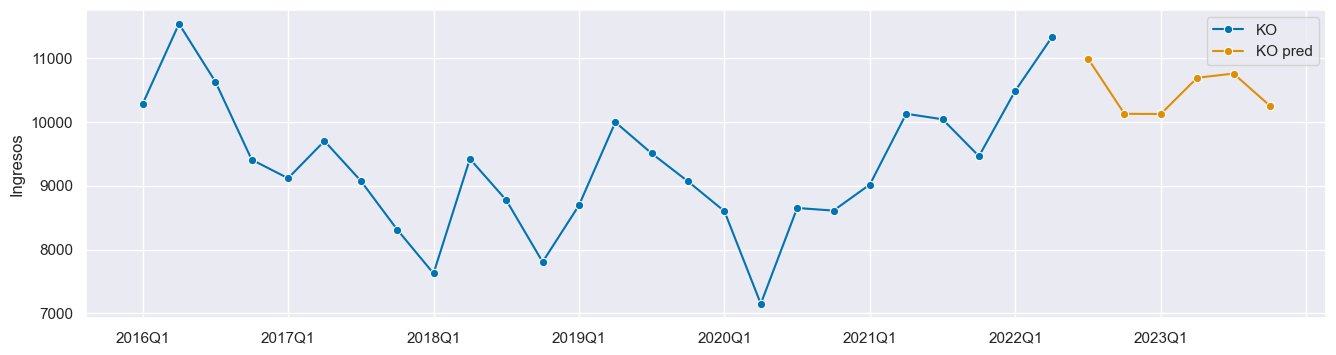

In [75]:
# Forecast Accuracy Plot
# Plotting predictions and past data
plot_series(ko_ts_q["2016":], np.exp(log_y_pred), labels=["KO", "KO pred"])